This notebook aims at:
1) Providing an in-depth analysis of the given dataset.

2) Preparing the data to make it suitable for a Machine learning model.

3) Giving you all what you need for a head start.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

Mass Shootings Dataset Ver 2.csv
Mass Shootings Dataset.csv



So there are two versions of this dataset available to us. The dataset has been updated recently. As of now, I will be focusing on the updated version and will try to get into as much detail as possible with version 2. Let's start by looking at the dataset

In [2]:
data = pd.read_csv('../input/Mass Shootings Dataset Ver 2.csv', encoding="ISO-8859-1")
print(data.shape)
data.head()

(320, 13)


,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,NaN,58,527,585,Unclear,White,M,36.181271,-115.134132
1,2,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,NaN,NaN
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/2017,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,M,NaN,NaN
3,4,Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Unclear,NaN,M,NaN,NaN
4,5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",5/12/2017,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,White,M,NaN,NaN


So we have date column, categorical and numerical columns along with some text columns like Title and Summary. I can see a lot of NaN too in the longitude and latitude column. Don't worry, we will take care of them as we go. We will start analyzing the dataset column by column. Let's drop the S# column first and convert the date column also.

In [3]:
# Drop the S# column
data.drop(['S#'], axis=1, inplace=True)

# Convert the date column as appropriate datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Split the date column into year, month and day
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day
data['Weekday'] = data.Date.dt.dayofweek

In [4]:
# Take an overview now
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 16 columns):
Title                   320 non-null object
Location                275 non-null object
Date                    320 non-null datetime64[ns]
Summary                 319 non-null object
Fatalities              320 non-null int64
Injured                 320 non-null int64
Total victims           320 non-null int64
Mental Health Issues    320 non-null object
Race                    318 non-null object
Gender                  320 non-null object
Latitude                303 non-null float64
Longitude               303 non-null float64
Year                    320 non-null int64
Month                   320 non-null int64
Day                     320 non-null int64
Weekday                 320 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(7), object(6)
memory usage: 40.1+ KB


In [5]:
# Let's check the number of NaN values before moving on to each column 
data.isnull().sum()

Title                    0
Location                45
Date                     0
Summary                  1
Fatalities               0
Injured                  0
Total victims            0
Mental Health Issues     0
Race                     2
Gender                   0
Latitude                17
Longitude               17
Year                     0
Month                    0
Day                      0
Weekday                  0
dtype: int64

Okay, so we have a lot of missing values in three columns namely, location, longitude and latitude. There is only one missing value in the summary column and I don't think it's that important.

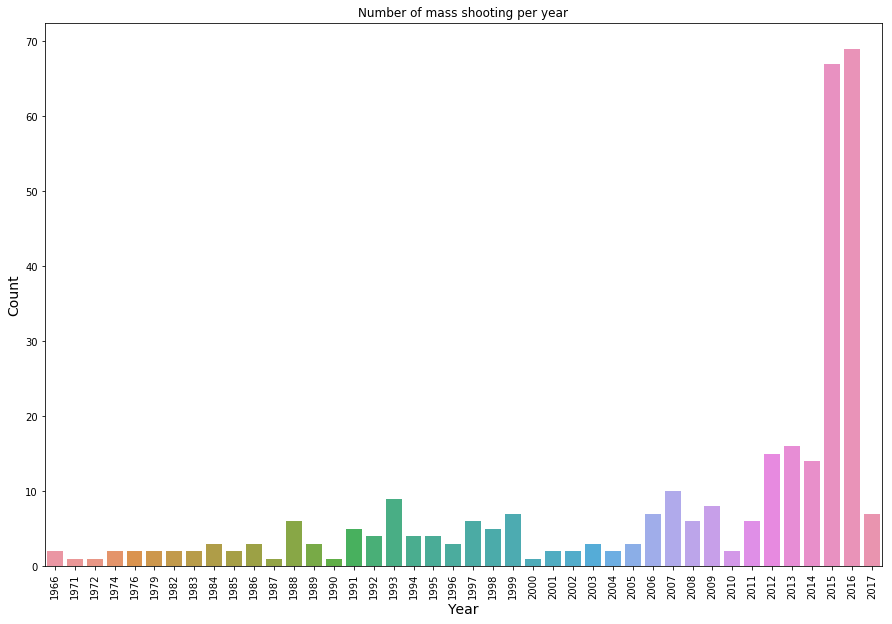

In [6]:
# Let's start with the year first. 
year_counts = data.Year.value_counts()

plt.figure(figsize=(15,10))
sns.barplot(year_counts.index, year_counts.values)
plt.title('Number of mass shooting per year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Overall the number of mass shooting has been increasing every year. The rate is almost exponential if we look at the data from 2010-2017. Is there some sort of pattern here? I suspect so. Presedential elections held in every four years. As the elections come nearby, number of mass shooting increases. Look at 2015-16(highest number of mass shooting), then look at 2012, 2007-08, 2003-04...

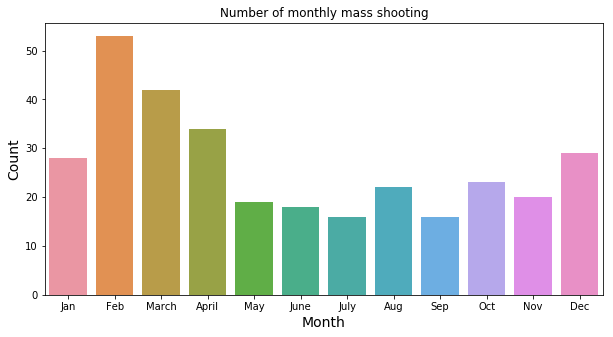

In [7]:
# What about the months? Which months count for maximum incidents?
month_counts = data.Month.value_counts()

plt.figure(figsize=(10,5))
sns.barplot(month_counts.index, month_counts.values)
months = ('Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
plt.title('Number of monthly mass shooting')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(12), months)
plt.show()

So, mass shooting happens most in Feb and then decreases at a good rate. Dec and Jan have almost the same number of mass shooting cases.

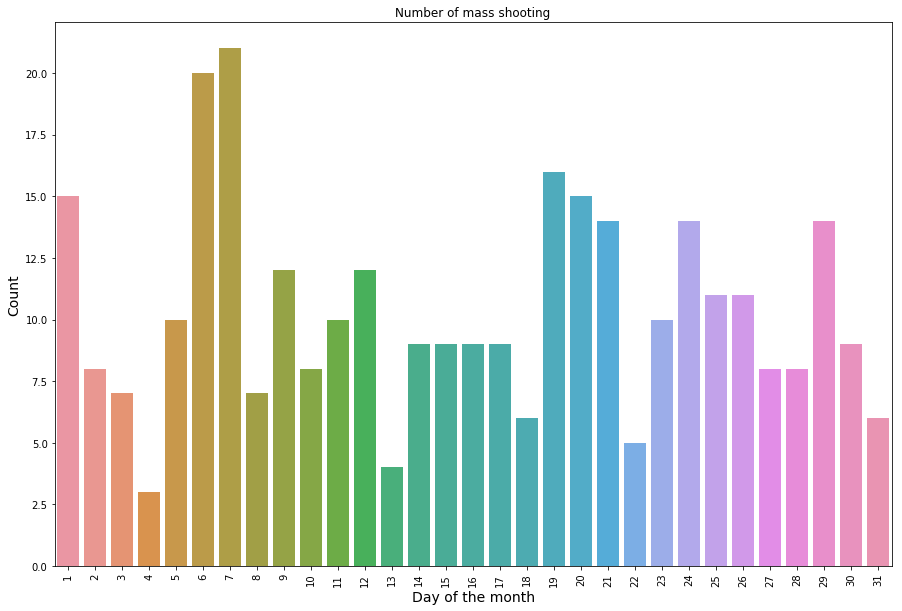

In [8]:
# What about the days of a month? 
day_counts = data.Day.value_counts()

plt.figure(figsize=(15,10))
sns.barplot(day_counts.index, day_counts.values)
plt.title('Number of mass shooting')
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

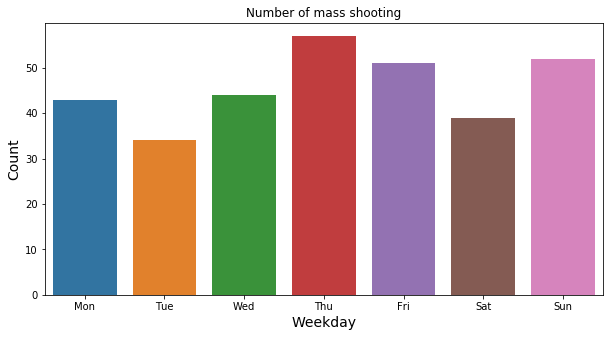

In [9]:
# What about the day of the week?
weekday_counts = data.Weekday.value_counts()

plt.figure(figsize=(10,5))
sns.barplot(weekday_counts.index, weekday_counts.values)
days = ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun')
plt.title('Number of mass shooting')
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(7), days)
plt.show()

So, Thursday contributes to the maximum number of mass shootings followed by Sunday and Friday.
Enough with the date, let's check the number of fatalities, injured and total victims 

Maximum number of fatalities in a mass shooting :  58
Minimum number of fatalities in a mass shooting :  0
Average number of fatalities in any mass shooting :  4


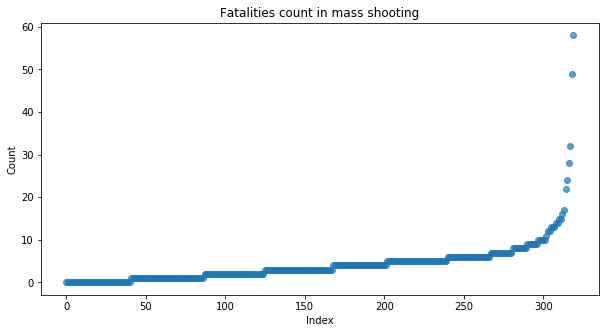

In [10]:
# Fatalities check
print("Maximum number of fatalities in a mass shooting : ", np.max(data['Fatalities']))
print("Minimum number of fatalities in a mass shooting : ", np.min(data['Fatalities']))
print("Average number of fatalities in any mass shooting : ", int(np.mean(data['Fatalities'])))

fat_count = data.Fatalities
plt.figure(figsize=(10,5))
plt.scatter(range(len(fat_count)), np.sort(fat_count.values), alpha=0.7)
plt.title("Fatalities count in mass shooting")
plt.xlabel("Index")
plt.ylabel("Count")
plt.show()

Maximum number of injured in a mass shooting :  527
Minimum number of injured in a mass shooting :  0
Average number of injured in any mass shooting :  6


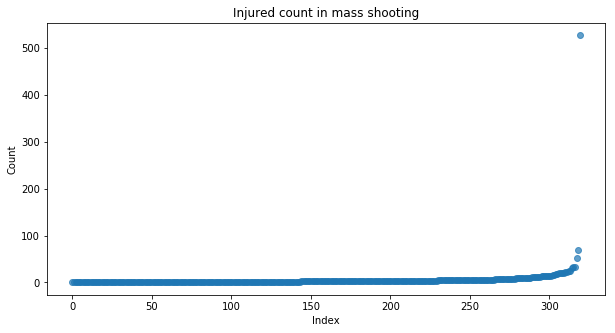

In [11]:
# Moving on to the injured column
print("Maximum number of injured in a mass shooting : ", np.max(data['Injured']))
print("Minimum number of injured in a mass shooting : ", np.min(data['Injured']))
print("Average number of injured in any mass shooting : ", int(np.mean(data['Injured'])))

inj_count = data['Injured']
plt.figure(figsize=(10,5))
plt.scatter(range(len(inj_count)), np.sort(inj_count.values), alpha=0.7)
plt.title("Injured count in mass shooting")
plt.xlabel("Index")
plt.ylabel("Count")
plt.show()

So, in case of **fatalities** we have at least two outliers and in case of **injuries**, we have at most one outlier.

Maximum number of victims in a mass shooting :  585
Minimum number of victims in a mass shooting :  3
Average number of victims in any mass shooting :  10


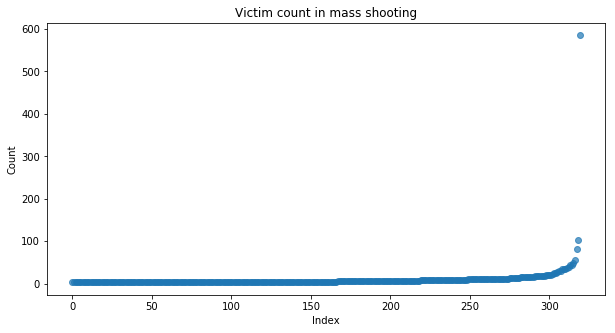

In [12]:
# Let's check the total number of victims in any case
print("Maximum number of victims in a mass shooting : ", np.max(data['Total victims']))
print("Minimum number of victims in a mass shooting : ", np.min(data['Total victims']))
print("Average number of victims in any mass shooting : ", int(np.mean(data['Total victims'])))

victim_count = data['Total victims']
plt.figure(figsize=(10,5))
plt.scatter(range(len(victim_count)), np.sort(victim_count.values), alpha=0.7)
plt.title("Victim count in mass shooting")
plt.xlabel("Index")
plt.ylabel("Count")
plt.show()

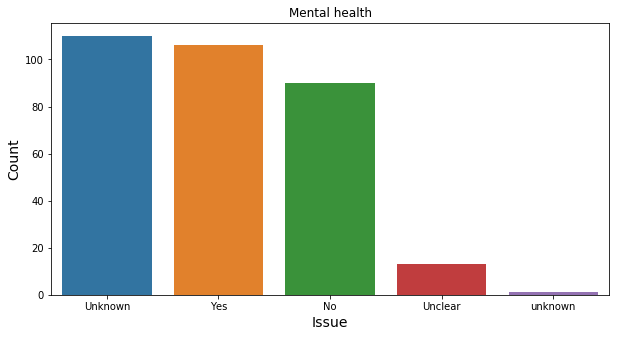

In [13]:
# Mental health issues
mental_health_count = data['Mental Health Issues'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(mental_health_count.index, mental_health_count.values)
plt.title('Mental health')
plt.xlabel('Issue', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(mental_health_count.index)), mental_health_count.index)
plt.show()

A lot of people involved in shooting were suffereing from mental health issues. Just make sure you combine **Unknown** and **unknown** before passing the data to a machine learning model. 

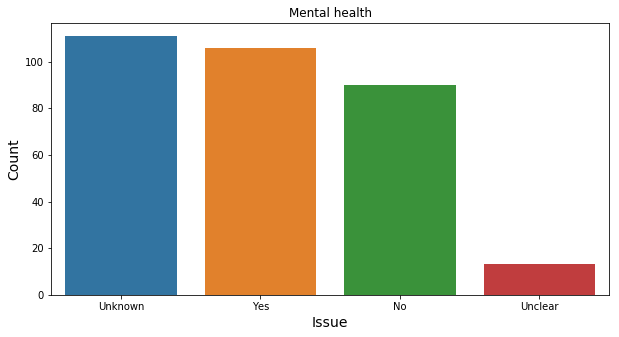

In [14]:
data['Mental Health Issues'] = data['Mental Health Issues'].apply(lambda x: 'Unknown' if x=='unknown' else x)

mental_health_count = data['Mental Health Issues'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(mental_health_count.index, mental_health_count.values)
plt.title('Mental health')
plt.xlabel('Issue', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(mental_health_count.index)), mental_health_count.index)
plt.show()

Let's move to the **Race** column now. This column may provide some deep insights about why mass shooting happened in the first place (e.g. hatred, etc.). Let's jump in.

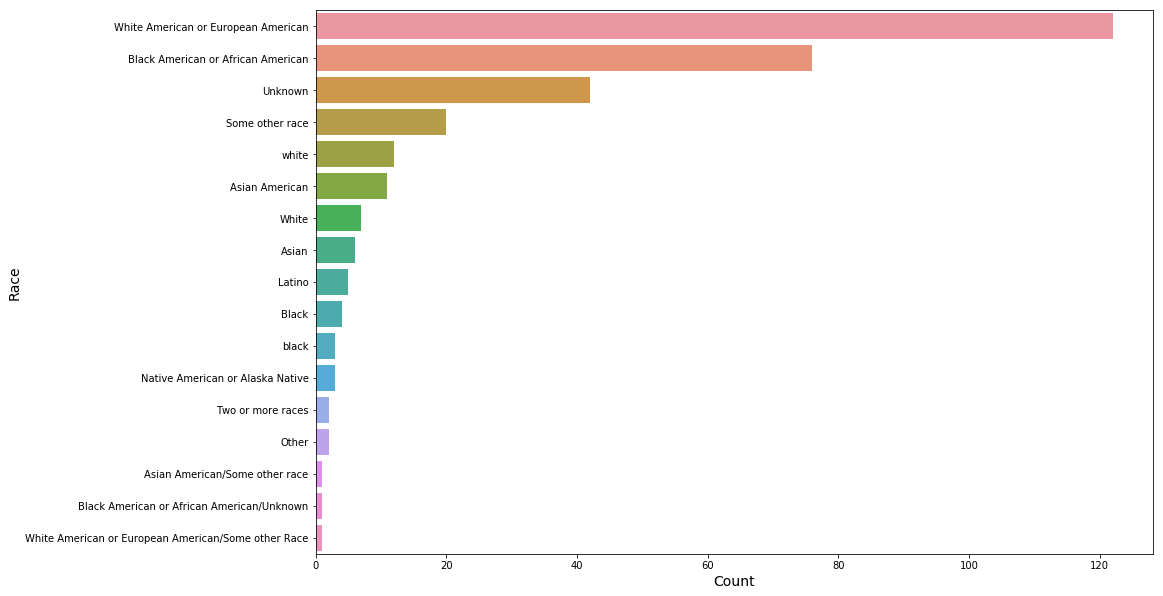

In [15]:
race_count = data['Race'].value_counts()

plt.figure(figsize=(15,10))
sns.barplot(race_count.values, race_count.index, orient='h')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Race', fontsize=14)
plt.show()

So maximum number of people involved in a mass shooting happens to be one of the following: White/European/Black/African American. There are people from other races too but that number is pretty low. 

There is an important thing to notice here. The categories as per the records are messed up. For example, we have **White American or European American** as well as **White American or European American/Some other Race**. This can be misleading for a machine learning model in some case. Though there might be some other good way to deal with this kind of info but here is the what I suggest:

1) Combine **white** and **White** as **White**

2) Combine **black** and **Black** as **Black**

3) Combine **White American or European American/Some other Race** and **White American or European American**

4) Combine **Black American or African American/Unknown** and **Black American or African American**

5) Combine **Asian American/Some other race** and **Asian American**

6) Combine **Two or more races** and **Other** with **Unknown**

In [16]:
data['Race'] = data['Race'].apply(lambda x : 'White' if x=='white' else x)
data['Race'] = data['Race'].apply(lambda x : 'Black' if x=='black' else x)

data['Race'] = data['Race'].apply(lambda x : 'White American or European American' 
                                  if x=='White American or European American/Some other Race' else x)

data['Race'] = data['Race'].apply(lambda x : 'Black American or African American' 
                                  if x=='Black American or African American/Unknown' else x)

data['Race'] = data['Race'].apply(lambda x : 'Asian American' if x=='Asian American/Some other race' else x)
data['Race'] = data['Race'].apply(lambda x : 'Unknown' if x=='Two or more races' or x =='unknown' else x)

data['Race'] = data['Race'].apply(lambda x : 'Other' if x=='Some other race' else x)

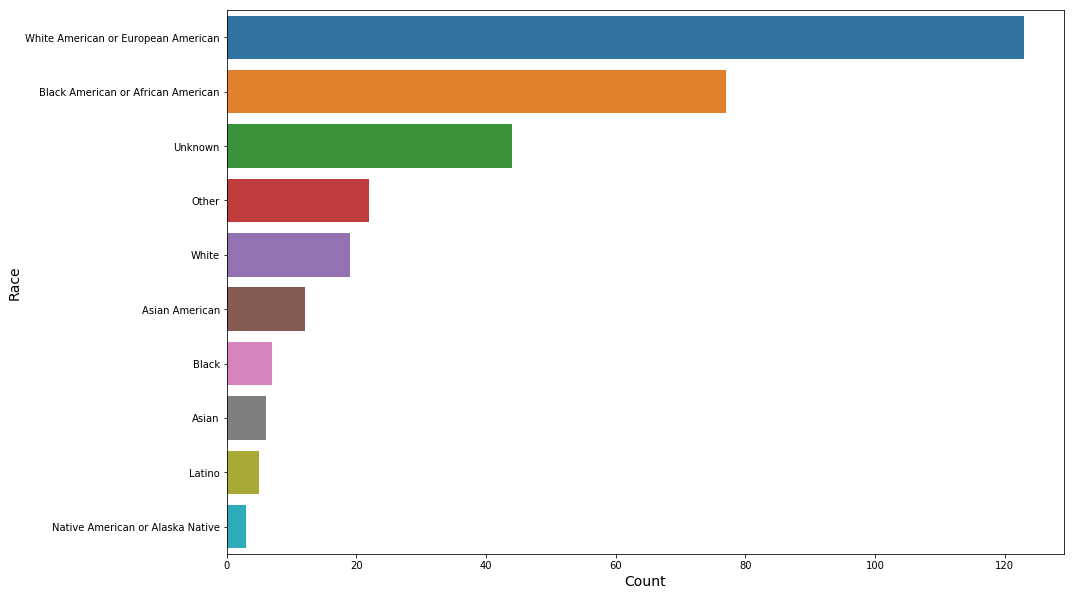

In [17]:
# Let's check the final results 
race_count = data['Race'].value_counts()

plt.figure(figsize=(15,10))
sns.barplot(race_count.values, race_count.index, orient='h')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Race', fontsize=14)
plt.show()

Perfect!!

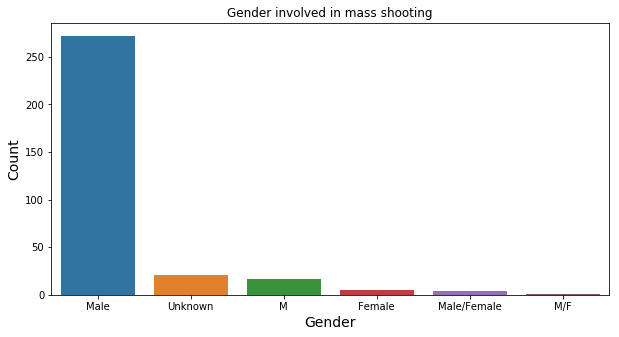

In [18]:
# Let's move to the Gender column now
gender = data['Gender'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(gender.index, gender.values)
plt.title('Gender involved in mass shooting')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(gender.index)), gender.index)
plt.show()

Nothing odd that **Male** would have been involved in the mass shooting most. But here again, the data needs cleansing. So, let's do that first.

In [19]:
data['Gender'] = data['Gender'].apply(lambda x: 'Male' if x=='M' else x)
data['Gender'] = data['Gender'].apply(lambda x: 'Unknown' if x=='M/F' or x=='Male/Female' else x)

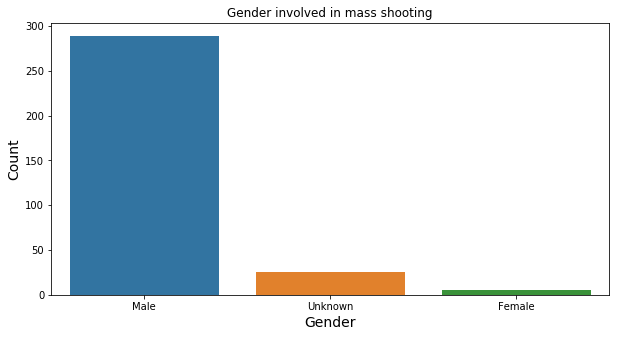

In [20]:
# Let's check it once more now
gender = data['Gender'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(gender.index, gender.values)
plt.title('Gender involved in mass shooting')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(gender.index)), gender.index)
plt.show()

Now, let's explore one more interesting and important column. The **Location** where mass shooting happened.

In [21]:
data.Location.value_counts()

Seattle, Washington                                           5
Phoenix, Arizona                                              4
Killeen, Texas                                                4
Chicago, Illinois                                             3
New Orleans, Louisiana                                        3
Omaha, Nebraska                                               3
Orlando, Florida                                              3
Dallas, Texas                                                 3
Los Angeles, California                                       3
Tucson, Arizona                                               3
Cleveland, Ohio                                               3
Las Vegas, Nevada                                             3
Mesa, Arizona                                                 2
Minneapolis, Minnesota                                        2
Pittsburgh, Pennsylvania                                      2
Birmingham, Alabama                     

In [22]:
# We can split the location column into two different columns: City and State. Let's do that first
data['City'] = data['Location'].str.rpartition(',')[0]
data['State'] = data['Location'].str.rpartition(',')[2]

In [23]:
# Lets' look at the values of the state column
data.State.value_counts()

 California        29
 Florida           20
 Texas             16
 Washington        14
 Georgia           13
 Arizona           11
 North Carolina    11
 Ohio              10
 New York          10
 Alabama            9
 Illinois           9
 Wisconsin          9
 Pennsylvania       8
 Michigan           6
 Colorado           6
 Tennessee          5
 Nevada             5
 Oklahoma           5
 South Carolina     5
 Kentucky           5
 Virginia           5
 Mississippi        4
 Oregon             4
 Massachusetts      4
 Minnesota          4
 Kansas             4
 Louisiana          4
 Missouri           3
 New Jersey         3
 Nebraska           3
 New Mexico         3
 Connecticut        3
 CA                 2
 Utah               2
 Arkansas           2
 Montana            2
 Iowa               1
 Vermont            1
 Maine              1
 Indiana            1
 Idaho              1
 NV                 1
 Texas              1
 WA                 1
 South Dakota       1
 West Virg

In [24]:
# Either convert all States to their abbreviations or do the reverse. Because we have only few entries as abbreviations
# we will do the reverse.
"""
1) Replace CA with California
2) Replace NV with Nevada
3) Replace LA with Louisiana
4) Replace PA with Pennsylvania
5) Replace WA with Washington D.C.
"""
data['State'] = data.State.str.strip()
data['State'] = data.State.str.replace('CA', 'California')
data['State'] = data.State.str.replace('NV', 'Nevada')
data['State'] = data.State.str.replace('LA', 'Louisiana')
data['State'] = data.State.str.replace('PA', 'Pennsylvania')
data['State'] = data.State.str.replace('WA', 'Washington D.C.')

In [25]:
# Let's check again
data.State.value_counts()

California         31
Florida            20
Texas              17
Washington         14
Georgia            13
North Carolina     11
Arizona            11
New York           10
Ohio               10
Illinois            9
Alabama             9
Wisconsin           9
Pennsylvania        9
Virginia            6
Michigan            6
Nevada              6
Colorado            6
South Carolina      5
Tennessee           5
Kentucky            5
Oklahoma            5
Louisiana           5
Oregon              4
Kansas              4
Massachusetts       4
Mississippi         4
Minnesota           4
Nebraska            3
Connecticut         3
New Mexico          3
New Jersey          3
Missouri            3
Arkansas            2
Washington D.C.     2
Utah                2
Montana             2
Iowa                1
Wyoming             1
Indiana             1
Vermont             1
South Dakota        1
Hawaii              1
Alaska              1
Idaho               1
Maine               1
West Virgi

So, maximum shooting happens in California followed by Florida and Texas. There are 45 missing values in this column, remember? So, let's go ahead and replace them with some value say, **Unknown**

In [26]:
data.Location.fillna('Unknown', inplace=True)
data.City.fillna('Unknown', inplace=True)
data.State.fillna('Unknown', inplace=True)

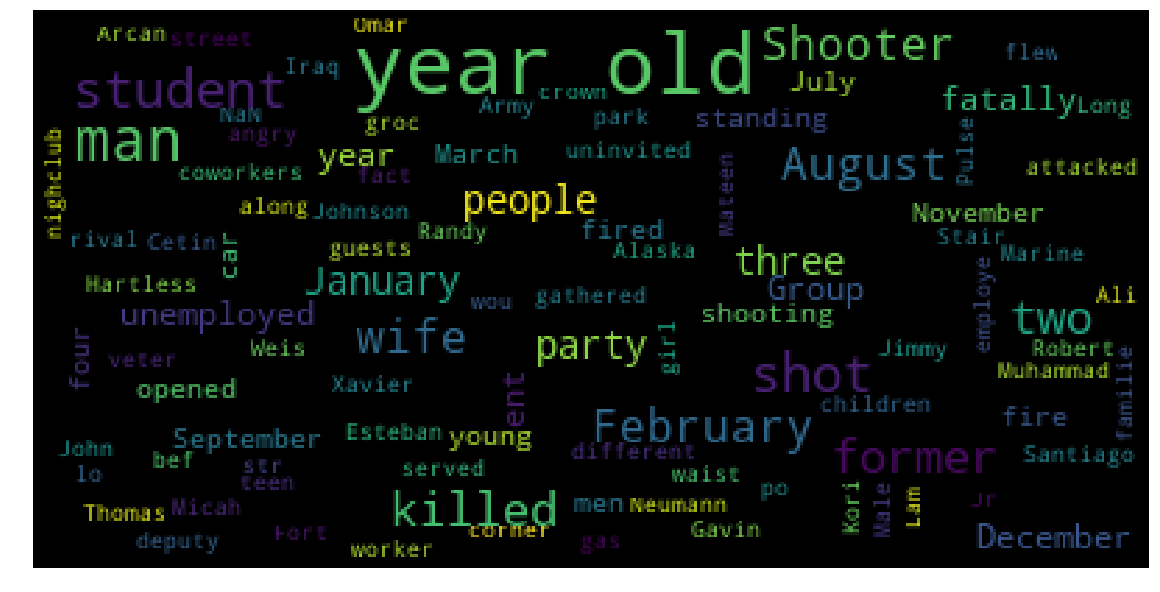

In [27]:
# Let's move to the summary column and check the wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='black',
                        stopwords=stopwords,
                        max_words=100,
                        max_font_size=30, 
                        random_state=42).generate(str(data['Summary']))

plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The **Title** column contain a lot of info. for example, Las Vegas Strip Mass shooting, describes the place and the event along with its type that happened. We already have the location info from the location column. Let's modify the content of this column to something short and informative.

That's it for now as I need to do something and that's too urgent. Some of the ideas that  you can use to clean this data more and build some pretty good models are:

1) You can extract valuable information like the cause of shooting from **Title** and **Summary** column. Better to combine the info and extract uncommon words.

2) I haven't visited the longitude and latitude columns yet but you can use this info if you are building a model to predict the number of victims in a shooting.

3) Are there sentiments in the **Summary** column?

4) Can you build a model that can be used to predict the motive behind a shooting incident?

I have tried to dig into the dataset as much as possible. If you have any suggestion, don't forget to mention it in the comments section and if you find this notebook useful, please upvote.